In [4]:
%matplotlib inline

import numpy as np
from __future__ import division

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.grid'] = False

import cv2

import logging
logger = logging.getLogger()

第二章 曲线越陡，对比度越强
=============
**编辑曲线就像是一种交易，提高某一区域的品质通常要其他区域付出代价。**

曲线调整命令路径是：图像 > 调整 > 曲线。快捷键是 Command-M。    

网格单元有 25% 和 10% 两种，可使用 Option 键单击网格进行切换。

平常使用 25%，LAB 空间使用 10% 来精准调整。

#### 2.1 左、右、上、下
默认 RGB 和 LAB 空间左黑右白，灰度和 CMYK 空间左白右黑。为了不让自己出错混淆，作者强烈建议统一上述四种空间的方向。     
作者建议使用左白右黑，这是印刷时代的标准。但我平常使用 Lightroom，为了一致，所以使用的是左黑右白的风格，和大多数数码软件匹配。

#### 2.2 曲线形状
本文谈到油墨的数值时，总是指网点面积覆盖率，即印刷品某一微小的局部被油墨覆盖的百分比。

###### 虚拟任务
将 $70^C$ 油墨调整到 $80^C$

有四种方案，如下所示：

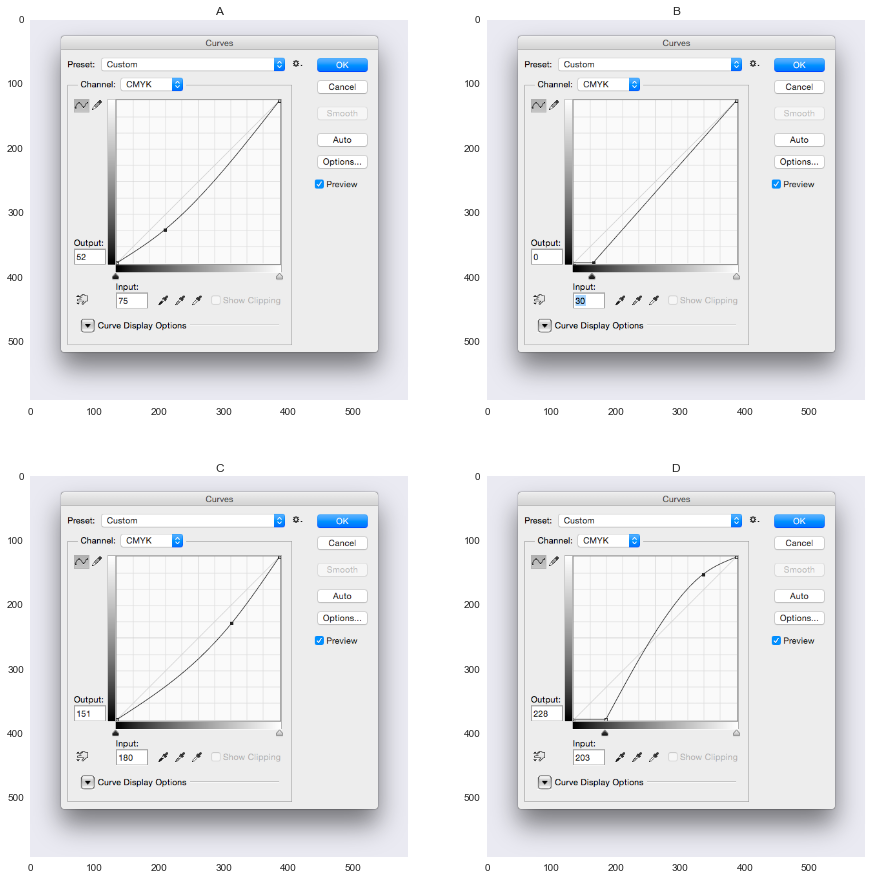

In [5]:
f, axarr = plt.subplots(2, 2, figsize=(15,15))
axarr[0,0].imshow(plt.imread('./res/70_80/A.png'))
axarr[0,0].set_title('A')

axarr[0,1].imshow(plt.imread('./res/70_80/B.png'))
axarr[0,1].set_title('B')

axarr[1,0].imshow(plt.imread('./res/70_80/C.png'))
axarr[1,0].set_title('C')

axarr[1,1].imshow(plt.imread('./res/70_80/D.png'))
axarr[1,1].set_title('D')

区别：    
观察亮部，颜料的使用量 D < B < A = C。    
所以 A,C 较 B, D 更偏蓝。

哪种方法更好呢？

视情况而定，     
但基本原则：但尽可能精确，清晰，简单。

### 2.3 改变曲线的角度，就是改变对比度
曲线越陡，对比度越强。

给感兴趣的主体分配最大对比度的曲线：将主体与次要部分分开。

### 2.4 只要能捉住老鼠

### 2.5 突出最重要的细节
修正下图的唯一方法就是让被撞的痕迹细节尽可能突显出来。

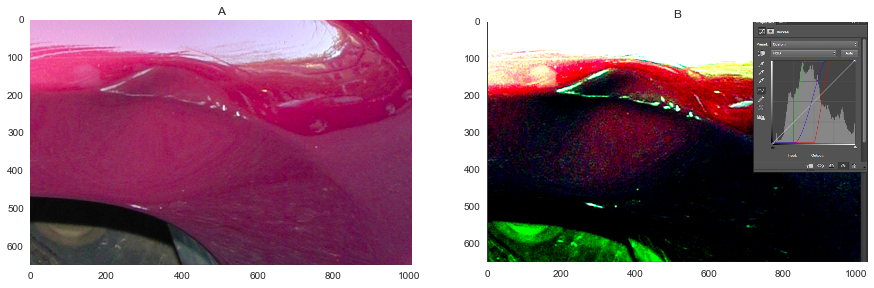

In [6]:
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(plt.imread('./res/fig_2_7/A.png'))
axarr[0].set_title('A')

axarr[1].imshow(plt.imread('./res/fig_2_7/B.png'))
axarr[1].set_title('B')

### 2.6 哪里重要，哪里不重要
调整方法：     
用曲线强调令人感兴趣的区域     
小心：不要改变总体色调，尽量减小对背景的损害



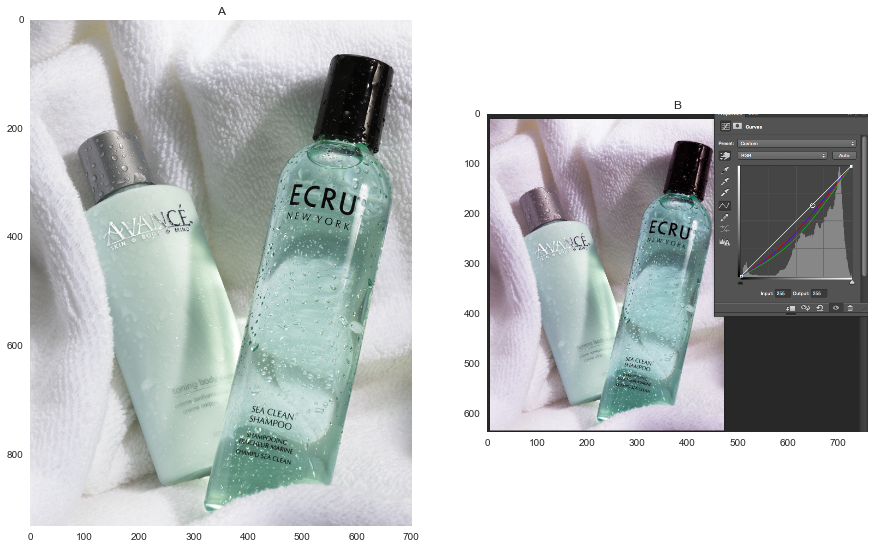

In [7]:
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(plt.imread('./res/fig_2_9/A.png'))
axarr[0].set_title('A')

axarr[1].imshow(plt.imread('./res/fig_2_9/B.png'))
axarr[1].set_title('B')

### 2.7 重新分配对比度
把强对比度从最亮和最暗区域转移到中间调

亮度/对比度是将两端点向内收，抹掉了高光和暗部的细节。      
解决方法：     
1. 自动色阶：它会仔细测量高光和暗部的极值点，从而保证细节不会全部抹掉。    
2. "S"型曲线

### 2.8 问一个傻问题，得到一个傻答案
傻问题：什么方法能把大多数照片调整到较好品质？     
傻答案：首先自动色阶，然后”S“型曲线微调

### 2.9 高光与极高光
选择不够亮的颜色作为亮光会破坏亮调的层次感。

亮光应该在画面的重要部分寻找。

应该避免的方法：    
1. 使用主曲线。     
2. 使用「图像〉调整〉色阶」。

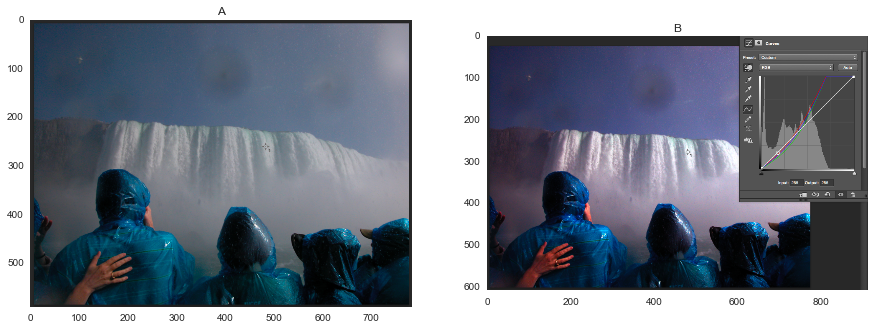

In [8]:
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(plt.imread('./res/fig2_12/A.png'))
axarr[0].set_title('A')

axarr[1].imshow(plt.imread('./res/fig2_12/B.png'))
axarr[1].set_title('B')

### 2.10 亮调与暗调
描述图片整体的明暗特征：暗调，中间调，亮调

「S」曲线丰富中间调，牺牲亮调和暗调细节

### 2.11 避免主曲线
图像主体是中性灰时可使用主曲线（RGB中成分一致），其他情况应该避免使用。

尤其在CMYK模式下，关键的黑色通道总是与另外3个通道大相径庭，使用主曲线会带来灾难性的后果。

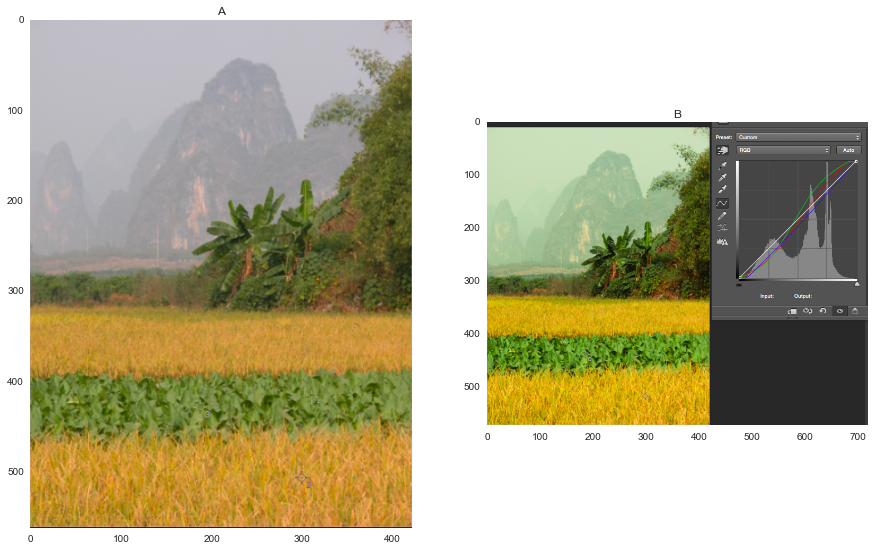

In [9]:
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(plt.imread('./res/fig2_15/A.png'))
axarr[0].set_title('A')

axarr[1].imshow(plt.imread('./res/fig2_15/B.png'))
axarr[1].set_title('B')

画面主体是绿色和黄色，背景偏红

思路：     
主体绿色较深沉，在绿色中间调，在红色和蓝色中较暗，    
主体黄色较明亮，在绿色和红色通道中较亮，在蓝色中较暗，     
所以强化绿色和红色通道的对比，而蓝色均在暗部，可压缩牺牲。

作者为了突出背景中红色，压平了红色通道的亮光部分，我在处理中拉高了绿色部分，所以有点背景有点绿色的色偏。

### 2.12 要走多远
标准图层与命令图层

保留原图和强对比图，控制不透明度来调整效果

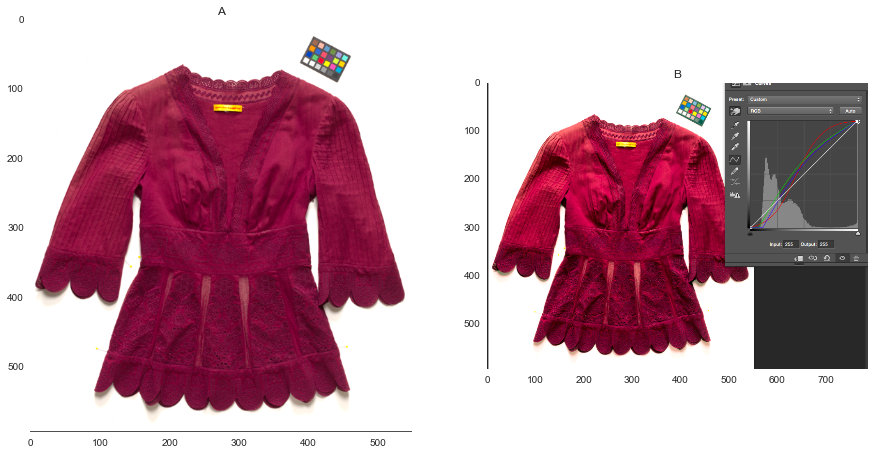

In [10]:
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(plt.imread('./res/fig2_18/A.png'))
axarr[0].set_title('A')

axarr[1].imshow(plt.imread('./res/fig2_18/B.png'))
axarr[1].set_title('B')

### 进入CMYK

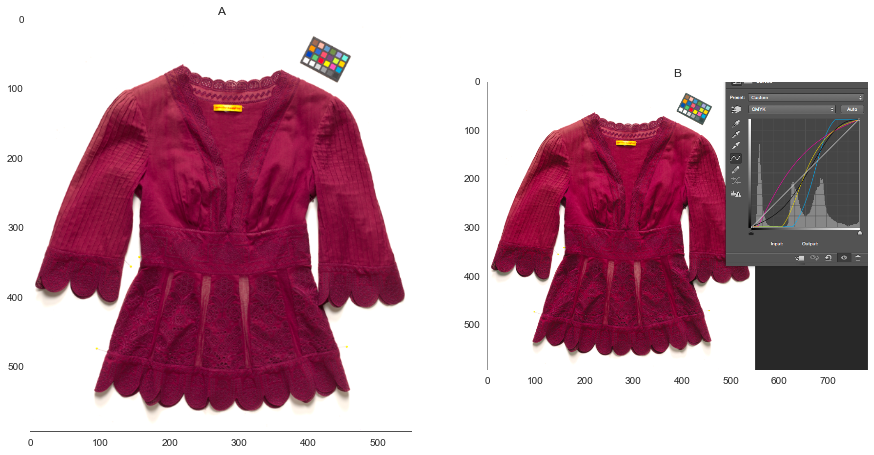

In [11]:
f, axarr = plt.subplots(1, 2, figsize=(15,15))
axarr[0].imshow(plt.imread('./res/fig2_18/A.png'))
axarr[0].set_title('A')

axarr[1].imshow(plt.imread('./res/fig2_19/B.png'))
axarr[1].set_title('B')

我不会调CMYK，感觉整体颜色不如RGB鲜艳。

CMYK因为有黑色通道，在其它通道可以使用更加陡峭的曲线。



### 2.14 RGB前的CMYK
但因为CMYK的色域不如RGB广，若最终输出是RGB，不建议转到CMYK调整：在转换中部分明亮色彩会失去。

### 2.15 自动色阶
调节白场和黑场来增加对比度。

### 回顾和练习
1. 折角对应于雨衣上的极高光。

2. 命令图层可逆，标准图层直观。

3. 不太清楚：可能是保留亮光和暗部的细节，或者是考虑到色彩混合的原因。